# Conditional Graph
1. Implement conditional logic to route the flow
2. Use `START` and `END` nodes to manage entry and exit point
3. Design multiple nodes to perform different operations
4. Create a `route node` to handle decision-making and control flow

Goal: Know how to use `add_conditional_edges()`

In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [7]:
# state schema
class AgentState(TypedDict):
    num1: int
    operator: str
    num2: int
    output: int

In [10]:
def add(state: AgentState) -> AgentState:
    """
    This function will add two numbers and return the result.
    """
    state["output"] = state["num1"] + state["num2"]
    return state

def subtract(state: AgentState) -> AgentState:
    """
    This function will subtract two numbers and return the result.
    """
    state["output"] = state["num1"] - state["num2"]
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """
    This node will decide the next node to go to
    """
    if state["operator"] == "+":
        return "addition_operation" # return the edge of the nodes
    elif state["operator"] == "-":
        return "subtraction_operation"

In [13]:
graph = StateGraph(AgentState)

graph.add_node("add_node", add)
graph.add_node("subtract_node", subtract)

# add router
graph.add_node("router", lambda state:state) # since we are not changing the state, we can just return the state (it's called pass-through function)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node",
    }
)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()

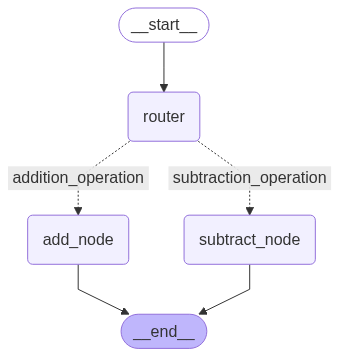

In [14]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [17]:
init_state_1 =  AgentState(num1=1, operator="+", num2=2)
print(app.invoke(init_state_1))

init_state_2 = AgentState(num1=3, operator="-", num2=5)
print(app.invoke(init_state_2))

{'num1': 1, 'operator': '+', 'num2': 2, 'output': 3}
{'num1': 3, 'operator': '-', 'num2': 5, 'output': -2}


# Exercise
Do a two layer router

In [18]:
class State(TypedDict):
    num1: int
    operator1: str
    num2: int
    num3: int
    operator2: str
    num4: int
    output1: int
    output2: int

def add_1(state: State) -> State:
    """
    First addition operation
    """
    state["output1"] = state["num1"] + state["num2"]
    return state

def subtract_1(state: State) -> State:
    """
    First subtraction operation
    """
    state["output1"] = state["num1"] - state["num2"]
    return state

def add_2(state: State) -> State:
    """
    Second addition operation
    """
    state["output2"] = state["num3"] + state["num4"]
    return state

def subtract_2(state: State) -> State:
    """
    Second subtraction operation
    """
    state["output2"] = state["num3"] - state["num4"]
    return state

def next_node_1(state: State) -> State:
    """
    First router
    """
    if state["operator1"] == "+":
        return "add_operation_1"
    elif state["operator1"] == "-":
        return "subtract_operation_1"

def next_node_2(state: State) -> State:
    """
    Second router
    """
    if state["operator2"] == "+":
        return "add_operation_2"
    elif state["operator2"] == "-":
        return "subtract_operation_2"

In [19]:
new_graph = StateGraph(State)
new_graph.add_node("add_node_1", add_1)
new_graph.add_node("subtract_node_1", subtract_1)
new_graph.add_node("add_node_2", add_2)
new_graph.add_node("subtract_node_2", subtract_2)

new_graph.add_node("router_1", lambda state:state)
new_graph.add_node("router_2", lambda state:state)

new_graph.add_edge(START, "router_1")
new_graph.add_conditional_edges(
    "router_1",
    next_node_1,
    {
        "add_operation_1": "add_node_1",
        "subtract_operation_1": "subtract_node_1",
    }
)

new_graph.add_edge("add_node_1", "router_2")
new_graph.add_edge("subtract_node_1", "router_2")

new_graph.add_conditional_edges(
    "router_2",
    next_node_2,
    {
        "add_operation_2": "add_node_2",
        "subtract_operation_2": "subtract_node_2",
    }
)

new_graph.add_edge("add_node_2", END)
new_graph.add_edge("subtract_node_2", END)

new_app = new_graph.compile()

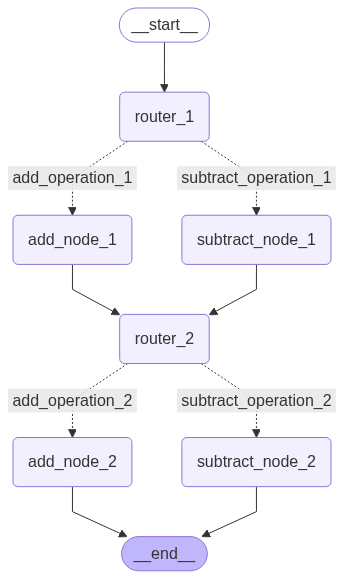

In [20]:
display(Image(new_app.get_graph().draw_mermaid_png()))

In [21]:
new_init_state = State(
    num1=10,
    operator1="-",
    num2=5,
    num3=7,
    operator2="+",
    num4=2,
    output1=0,
    output2=0,
)

result = new_app.invoke(new_init_state)
print(result)

{'num1': 10, 'operator1': '-', 'num2': 5, 'num3': 7, 'operator2': '+', 'num4': 2, 'output1': 5, 'output2': 9}
